# Anomalous Access Log Detection

**Authors : Andrew Konstans, Jacob Panyathong, Magdalena Rahn**  
    Codeup Data Science, Noether cohort, 23 February 2023

In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

import functions as f
import functions_m as m
import prepare_m as p


## Having been tasked to identify anomalies in access logs for the Codeup curriculum, we responded to the following questions :  

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts, one that other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?


### We first performed a MySQL query to obtain the access logs, then turned that information into a .csv file to facilitate future access.

In [2]:
# read in the .csv file

df = pd.read_csv('curriculum_logs.csv', index_col = [0])

In [3]:
# clean up df with date-time

df = p.to_datetime(df, 'date')

In [4]:
# overview of data

df.head(1)

,date,time,url_path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,date2
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26


### After cleaning, we started to addresses the issues at hand.

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [5]:
# find the most accessed lesson per programme

m.lesson_most_accessed(df)

The most accessed PHP cohort lesson page is javascript-i    736
Name: url_path, dtype: int64.
The most accessed full-stack java cohort lesson page is javascript-i    17457
Name: url_path, dtype: int64.
The most accessed data science cohort lesson page is classification/overview    1785
Name: url_path, dtype: int64.
The most accessed front-end cohort lesson page is content/html-css    2
Name: url_path, dtype: int64.


**TAKEAWAY, QUESTION 1 :**  

- The most accessed PHP lesson page is javascript-i, with 736 hits.

- The most accessed full-stack java lesson page is javascript-i, with 17457 hits.

- The most accessed data science lesson page is classification/overview, with 1785 hits.

- The most accessed front-end lesson page is content/html-css, with 2 hits.

&nbsp;

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts, one that other cohorts seemed to gloss over?

In [17]:
# most-accessed url per cohort

m.url_most_accessed(df)

Hampton url_path
java-iii    57
appendix    55
Name: program_id, dtype: int64

Teddy url_path
spring      744
java-iii    732
Name: program_id, dtype: int64

Sequoia url_path
spring                       364
spring/fundamentals/views    207
Name: program_id, dtype: int64

Arches url_path
javascript-i    294
html-css        215
Name: program_id, dtype: int64

Niagara url_path
spring      65
java-iii    29
Name: program_id, dtype: int64

Pinnacles url_path
javascript-i     69
javascript-ii    58
Name: program_id, dtype: int64

Quincy url_path
content/laravel/intro    38
content/html-css         33
Name: program_id, dtype: int64

Kings url_path
content/laravel/intro                               83
content/laravel/intro/application-structure.html    63
Name: program_id, dtype: int64

Lassen url_path
javascript-i    233
java-iii        224
Name: program_id, dtype: int64

Mammoth url_path
java-i      19
java-iii    13
Name: program_id, dtype: int64

Glacier url_path
content/html-css        

**TAKEAWAY, QUESTION 2 :**  

The Jupiter cohort had a quite large (1866) number of accesses to the ‘toc’ page. Many cohorts accessed the ‘toc’ page, but Jupiter’s amount of access was notably higher.   

The Staff cohort accessed the javascript-i page 1817 times, the next closes access was with the Ceres cohort, at 1003 accesses.

&nbsp;

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

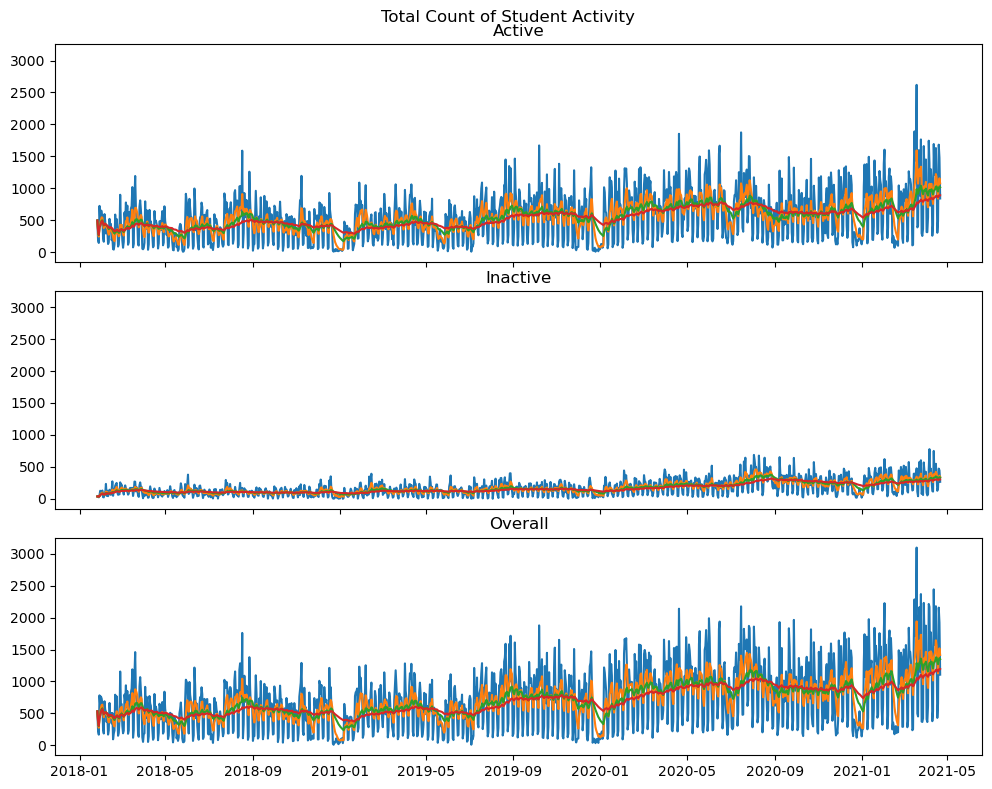

In [7]:
# log access activity : active students and alumni (inactive)

f.student_activity_plot(df)


**TAKEAWAY, QUESTION 3:**  
    
We found that active students accessed the curriculum more than inactive ones.    

&nbsp;

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

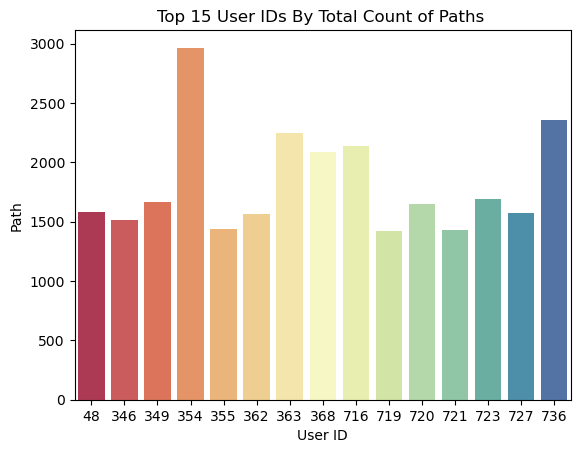

In [8]:
# user id access counts

f.top_15_plot(df)

**TAKEAWAY, QUESTION 4:**  
    
We found suspicious behaviors, including such things as missing user IDs and cohort names, to multiple ip addresses that proved to be suspicious, and anomalies in our data.     

&nbsp;

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [9]:
# access cut-off

f.check_permissions(df, 'url_path')

             date      time                      url_path  user_id  cohort_id  \
328347 2019-09-23  11:45:09                      java-iii      476       34.0   
330826 2019-09-25  19:30:44                  javascript-i      476       34.0   
330828 2019-09-25  19:31:07                  javascript-i      476       34.0   
330829 2019-09-25  19:31:11                        java-i      476       34.0   
330830 2019-09-25  19:31:12                  javascript-i      476       34.0   
330831 2019-09-25  19:31:14                        java-i      476       34.0   
330832 2019-09-25  19:31:19                       java-ii      476       34.0   
330837 2019-09-25  19:32:23                  javascript-i      476       34.0   
330838 2019-09-25  19:32:34                        java-i      476       34.0   
330839 2019-09-25  19:32:38                        java-i      476       34.0   
330840 2019-09-25  19:32:44             java-i/console-io      476       34.0   
377469 2019-11-25  14:26:14 

**TAKEAWAY, QUESTION 5 :**  
    
It turns that permissions were never shut off in 2019. Data science cohorts did not even begin until early / mid-2019 and they had access to web development materials all throughout the year.

&nbsp;

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [10]:
# most-accessed curriculum urls by alumni, programme #1 (PHP full-stack)

f.post_grad(df, 1, 'url_path')

javascript-i    736
html-css        542
spring          501
java-iii        479
java-ii         454
Name: url_path, dtype: int64



In [11]:
# most-accessed curriculum urls by alumni, programme #2 (full-stack / java)

f.post_grad(df, 2, 'url_path')

javascript-i    4229
spring          3760
html-css        3136
java-iii        3058
java-ii         2985
Name: url_path, dtype: int64



In [12]:
# most-accessed curriculum urls by alumni, programme #3 (data science)

f.post_grad(df, 3, 'url_path')

sql/mysql-overview                                275
classification/overview                           266
classification/scale_features_or_not.svg          219
anomaly-detection/AnomalyDetectionCartoon.jpeg    193
anomaly-detection/overview                        191
Name: url_path, dtype: int64



In [13]:
# most-accessed curriculum urls by alumni, programme #4 (front-end web dev)

f.post_grad(df, 4, 'url_path')

content/html-css                               2
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: url_path, dtype: int64



**TAKEAWAY, QUESTION 6:**  
    
Graduates referenced a number of topics after graduation in the curricula , however, SQL proved to be the most common topic to be searched across cohorts, no matter the programme.

&nbsp;

### 7. Which lessons are least accessed?

In [14]:
# least-total accessed url, all cohorts together 

f.least_total(df, 'url_path', 3, 5)

content/appendix/further-reading/gitbook/images/favicon.ico    6
2.03.06_CorrelationTests                                       6
servlets                                                       6
Name: url_path, dtype: int64



In [15]:
# least-accessed url per cohort

f.least_cohort(df, 'url_path', 1, 5)

url_path               name     url_path             
mysql/sample-database  Hampton  mysql/sample-database    6
Name: url_path, dtype: int64

url_path                   name   url_path                 
prework/cli/03-file-paths  Teddy  prework/cli/03-file-paths    6
Name: url_path, dtype: int64

url_path                               name     url_path                             
examples/javascript/dom-query-js.html  Sequoia  examples/javascript/dom-query-js.html    6
Name: url_path, dtype: int64

url_path                                  name    url_path                                
prework/cli/04-navigating-the-filesystem  Arches  prework/cli/04-navigating-the-filesystem    6
Name: url_path, dtype: int64

url_path                name     url_path              
appendix/documentation  Niagara  appendix/documentation    6
Name: url_path, dtype: int64

url_path                             name       url_path                           
javascript-i/bom-and-dom/dom-events  Pinnacles 

**TAKEAWAY, QUESTION 7:**
    
Overall, it seems that correlation tests were the least-searched ; however, there are more than 50 paths that have only one search total.    

 &nbsp; 

## Conclusions

**Numerous irregularities (anomalies) were detected. Greater oversight of curriculum access and consistency of access permissions is advisable.**